In [ ]:
from os import environ, remove
from configparser import ConfigParser
from glob import glob
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs
from cftime import num2date

import hydrostats.metrics as hm

import pickle

from grpc4bmi.bmi_client_docker import BmiClientDocker
from ewatercycle.observation.grdc import get_grdc_data

In [2]:
lamda = 2.43 * (10 **6)
rho = 1000

In [3]:
def ME1(df):
    df['verschil'] = df.total_evaporation - df.LE_F_MDS
    df['verschilkwadraat'] = (df.total_evaporation - df.LE_F_MDS)**2
    ME= df['verschil'].sum() / len(df)
    RMSE = np.sqrt(df['verschilkwadraat'].sum() / len(df))
    
    return ME, RMSE

def ME2(df):
    df['verschil'] = df.total_evaporation - df.LE_F
    df['verschilkwadraat'] = (df.total_evaporation - df.LE_F)**2
    ME= df['verschil'].sum() / len(df)
    RMSE = np.sqrt(df['verschilkwadraat'].sum() / len(df))
    
    return ME, RMSE


In [4]:
df = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/fluxnet_toren_selectie_ME.csv", skipinitialspace=True,index_col=0, delimiter=';')
df['MEdag'] = np.nan
df['RMSEdag'] = np.nan
df['MEmaand'] = np.nan
df['RMSEmaand'] = np.nan

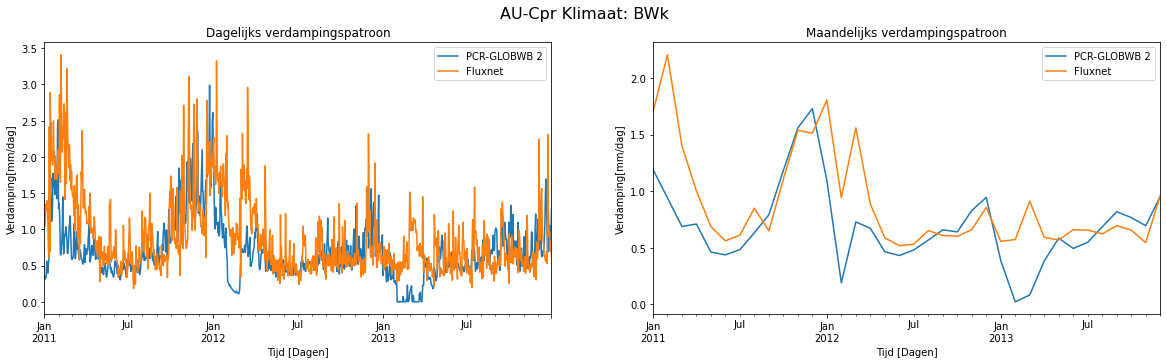

In [11]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/au-cpr_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_AU-Cpr.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2011-01-01": '2013-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20, 5))
plt.suptitle(f'AU-Cpr Klimaat: BWk',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/au-cpr.jpg')
df.at['AU-Cpr','MEdag']= ME1(ts)[0]
df.at['AU-Cpr','RMSEdag'] = ME1(ts)[1]
df.at['AU-Cpr','MEmaand'] = ME1(tsmaand)[0]
df.at['AU-Cpr','RMSEmaand'] = ME1(tsmaand)[1]

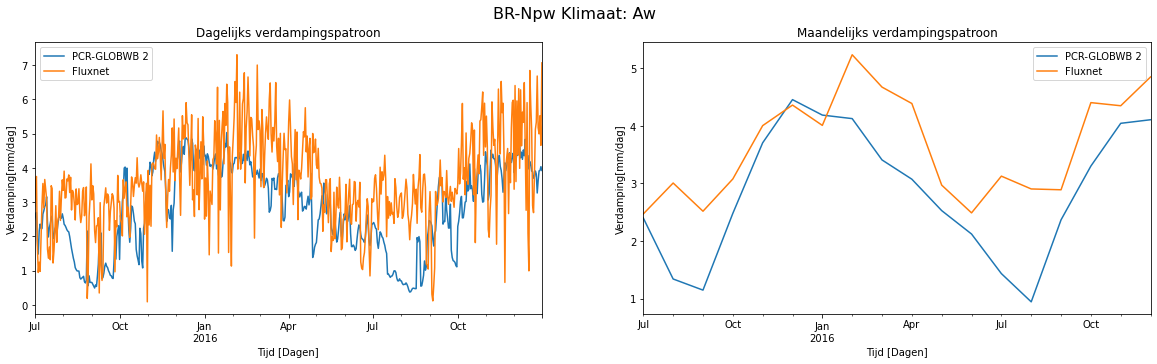

In [6]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/br-npw_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()
ts = ts["2015-7": '2016']

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_BR-Npw.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2015-7": '2016']["LE_F"]

ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'BR-Npw Klimaat: Aw',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/br-npw.jpg')
df.at['BR-Npw','MEdag']= ME2(ts)[0]
df.at['BR-Npw','RMSEdag'] = ME2(ts)[1]
df.at['BR-Npw','MEmaand'] = ME2(tsmaand)[0]
df.at['BR-Npw','RMSEmaand'] = ME2(tsmaand)[1]

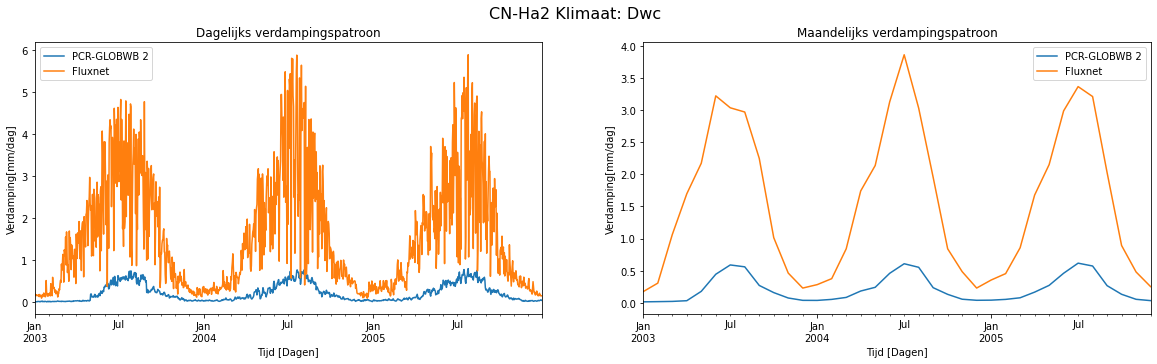

In [7]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/cn-ha2_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_CN-Ha2.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2003-01-01": '2005-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'CN-Ha2 Klimaat: Dwc',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/cn-ha2.jpg')
df.at['CN-Ha2','MEdag']= ME1(ts)[0]
df.at['CN-Ha2','RMSEdag'] = ME1(ts)[1]
df.at['CN-Ha2','MEmaand'] = ME1(tsmaand)[0]
df.at['CN-Ha2','RMSEmaand'] = ME1(tsmaand)[1]

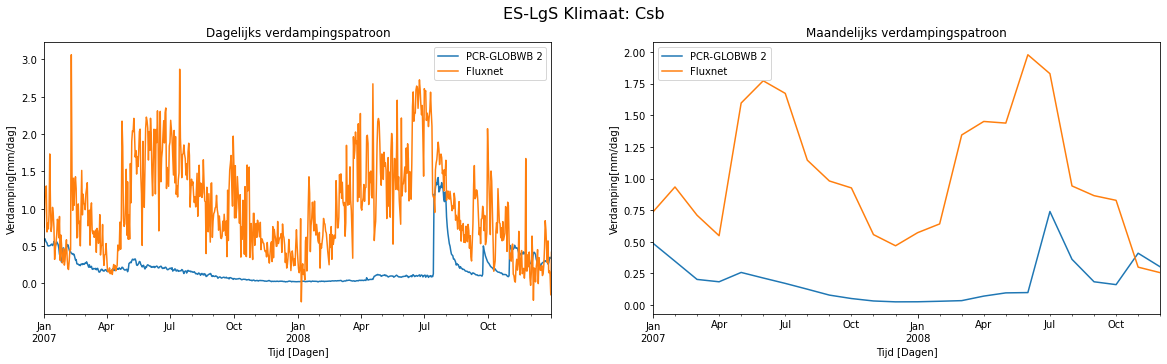

In [8]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/es-lgs_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_ES-LgS.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2007-01-01": '2008-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'ES-LgS Klimaat: Csb',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/es-lgs.jpg')
df.at['ES-LgS','MEdag']= ME1(ts)[0]
df.at['ES-LgS','RMSEdag'] = ME1(ts)[1]
df.at['ES-LgS','MEmaand'] = ME1(tsmaand)[0]
df.at['ES-LgS','RMSEmaand'] = ME1(tsmaand)[1]

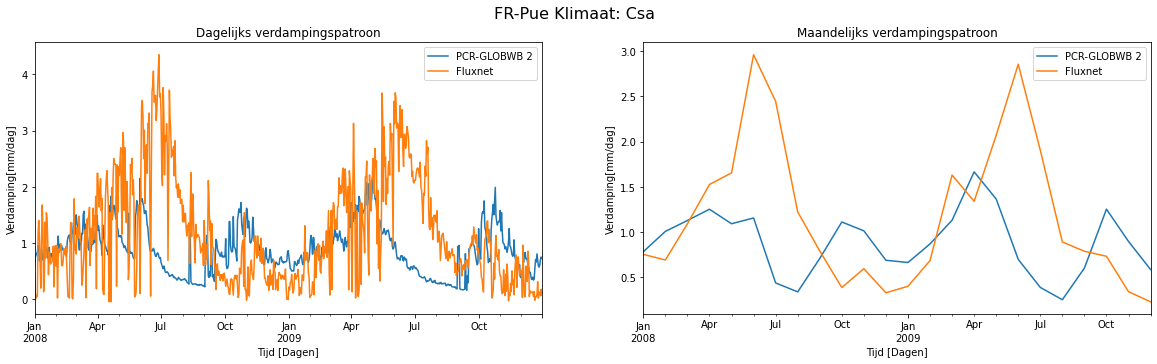

In [9]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/fr-pue_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_FR-Pue.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2009-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'FR-Pue Klimaat: Csa',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/fr-pue.jpg')
df.at['FR-Pue','MEdag']= ME1(ts)[0]
df.at['FR-Pue','RMSEdag'] = ME1(ts)[1]
df.at['FR-Pue','MEmaand'] = ME1(tsmaand)[0]
df.at['FR-Pue','RMSEmaand'] = ME1(tsmaand)[1]


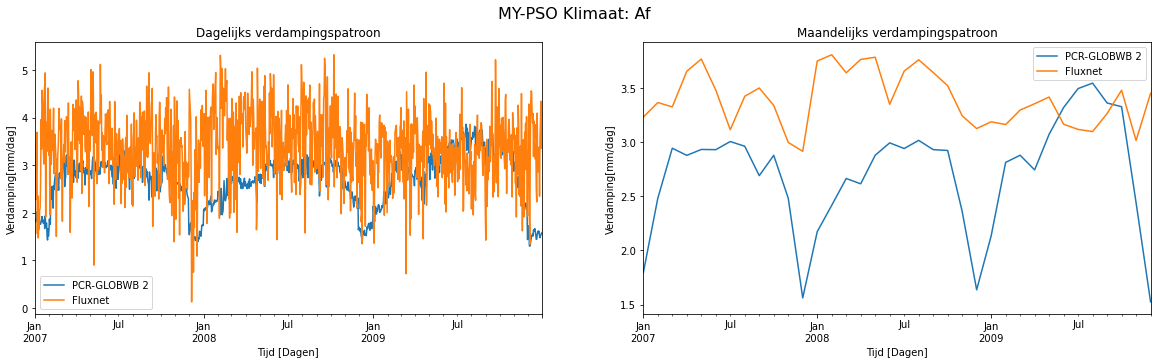

In [10]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/my-pso_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_MY-PSO.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2007-01-01": '2009-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'MY-PSO Klimaat: Af',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/my-pso.jpg')
df.at['MY-PSO','MEdag']= ME1(ts)[0]
df.at['MY-PSO','RMSEdag'] = ME1(ts)[1]
df.at['MY-PSO','MEmaand'] = ME1(tsmaand)[0]
df.at['MY-PSO','RMSEmaand'] = ME1(tsmaand)[1]


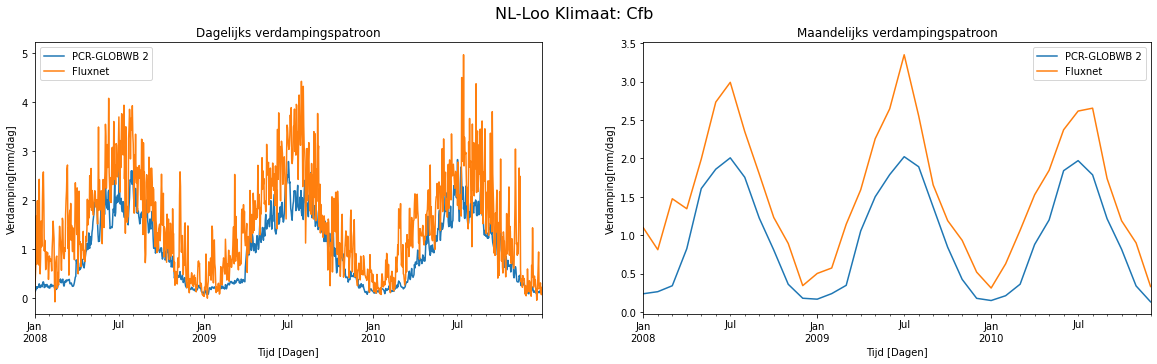

In [11]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/nl-loo_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_NL-Loo.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2010-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'NL-Loo Klimaat: Cfb',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/nl-loo.jpg')
df.at['NL-Loo','MEdag']= ME1(ts)[0]
df.at['NL-Loo','RMSEdag'] = ME1(ts)[1]
df.at['NL-Loo','MEmaand'] = ME1(tsmaand)[0]
df.at['NL-Loo','RMSEmaand'] = ME1(tsmaand)[1]


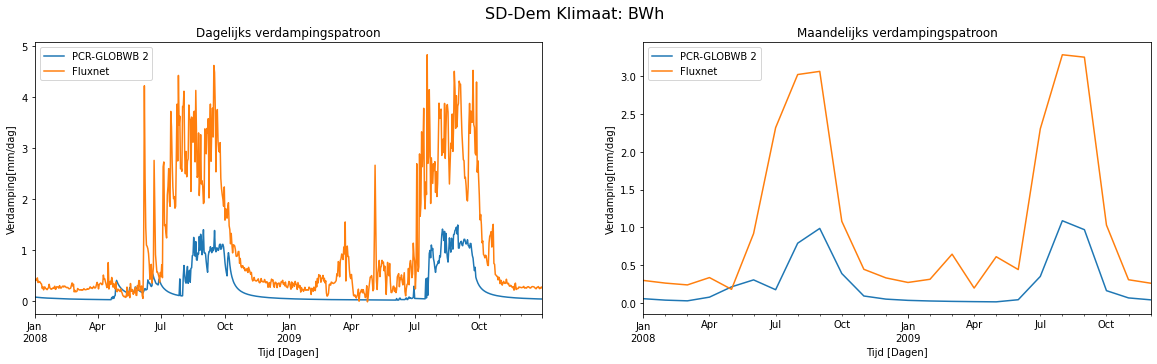

In [12]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/sd-dem_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_SD-Dem.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2009-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'SD-Dem Klimaat: BWh',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/sd-dem.jpg')
df.at['SD-Dem','MEdag']= ME1(ts)[0]
df.at['SD-Dem','RMSEdag'] = ME1(ts)[1]
df.at['SD-Dem','MEmaand'] = ME1(tsmaand)[0]
df.at['SD-Dem','RMSEmaand'] = ME1(tsmaand)[1]

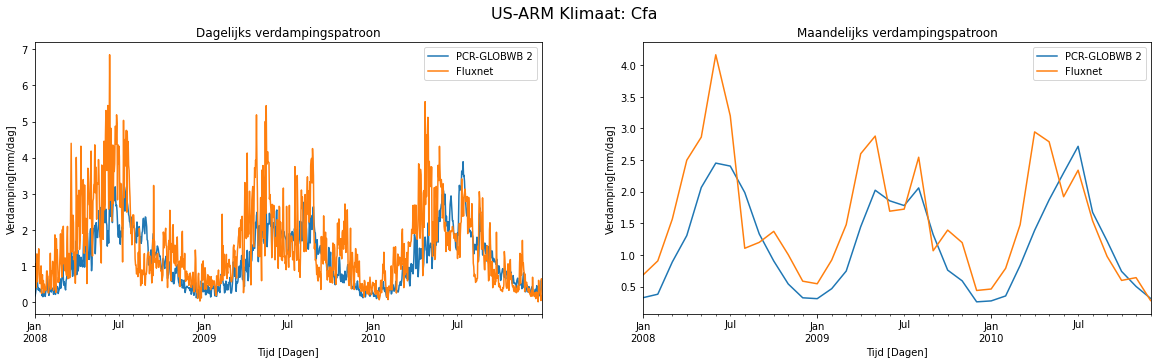

In [13]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/us-arm_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_US-ARM.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2010-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'US-ARM Klimaat: Cfa',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/us-arm.jpg')
df.at['US-ARM','MEdag']= ME1(ts)[0]
df.at['US-ARM','RMSEdag'] = ME1(ts)[1]
df.at['US-ARM','MEmaand'] = ME1(tsmaand)[0]
df.at['US-ARM','RMSEmaand'] = ME1(tsmaand)[1]


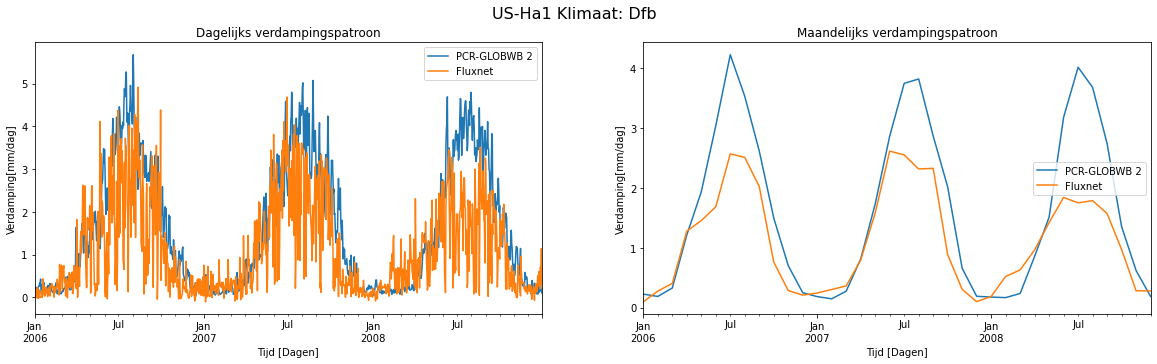

In [14]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/us-ha1_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_US-Ha1.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2006-01-01": '2008-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'US-Ha1 Klimaat: Dfb',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/us-ha1.jpg')
df.at['US-Ha1','MEdag']= ME1(ts)[0]
df.at['US-Ha1','RMSEdag'] = ME1(ts)[1]
df.at['US-Ha1','MEmaand'] = ME1(tsmaand)[0]
df.at['US-Ha1','RMSEmaand'] = ME1(tsmaand)[1]


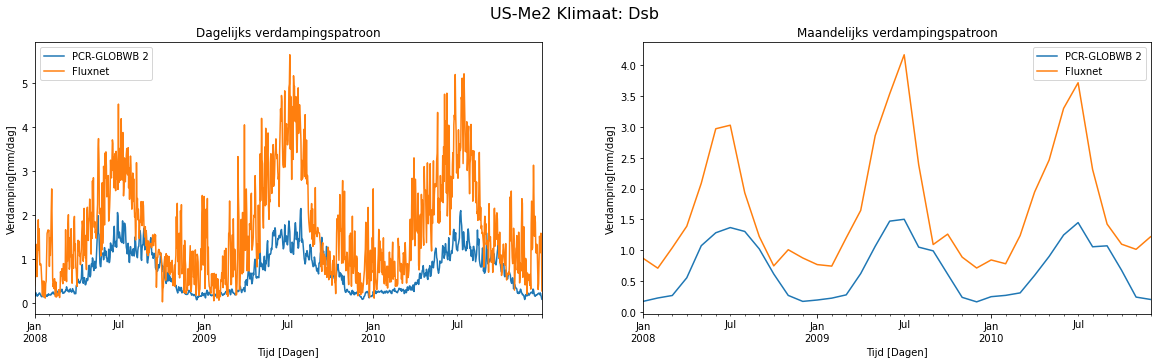

In [15]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/us-me2_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_US-Me2.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2010-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'US-Me2 Klimaat: Dsb',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/us-me2.jpg')
df.at['US-Me2','MEdag']= ME1(ts)[0]
df.at['US-Me2','RMSEdag'] = ME1(ts)[1]
df.at['US-Me2','MEmaand'] = ME1(tsmaand)[0]
df.at['US-Me2','RMSEmaand'] = ME1(tsmaand)[1]

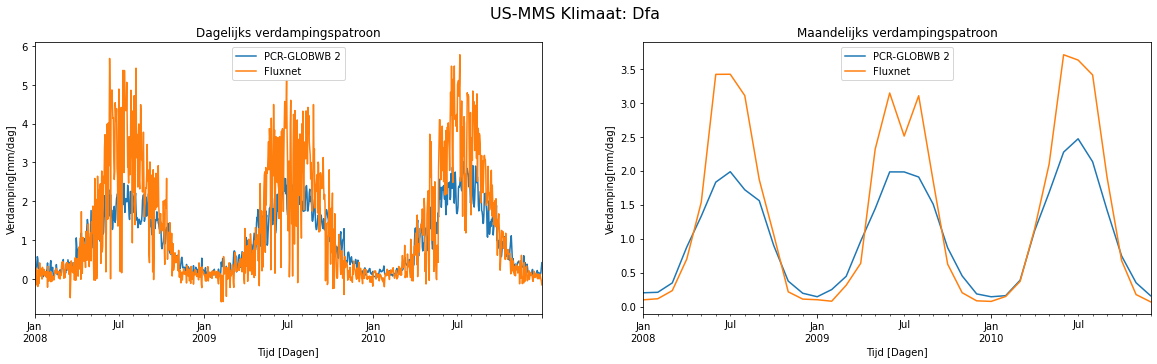

In [16]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/us-mms_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_US-MMS.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2010-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'US-MMS Klimaat: Dfa',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/us-mms.jpg')
df.at['US-MMS','MEdag']= ME1(ts)[0]
df.at['US-MMS','RMSEdag'] = ME1(ts)[1]
df.at['US-MMS','MEmaand'] = ME1(tsmaand)[0]
df.at['US-MMS','RMSEmaand'] = ME1(tsmaand)[1]

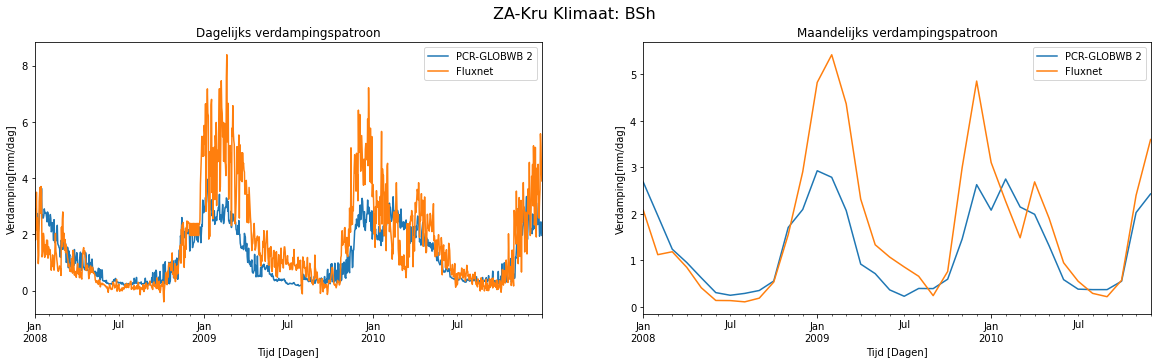

In [17]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/za-kru_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_ZA-Kru.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2010-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'ZA-Kru Klimaat: BSh',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/za-kru.jpg')
df.at['ZA-Kru','MEdag']= ME1(ts)[0]
df.at['ZA-Kru','RMSEdag'] = ME1(ts)[1]
df.at['ZA-Kru','MEmaand'] = ME1(tsmaand)[0]
df.at['ZA-Kru','RMSEmaand'] = ME1(tsmaand)[1]


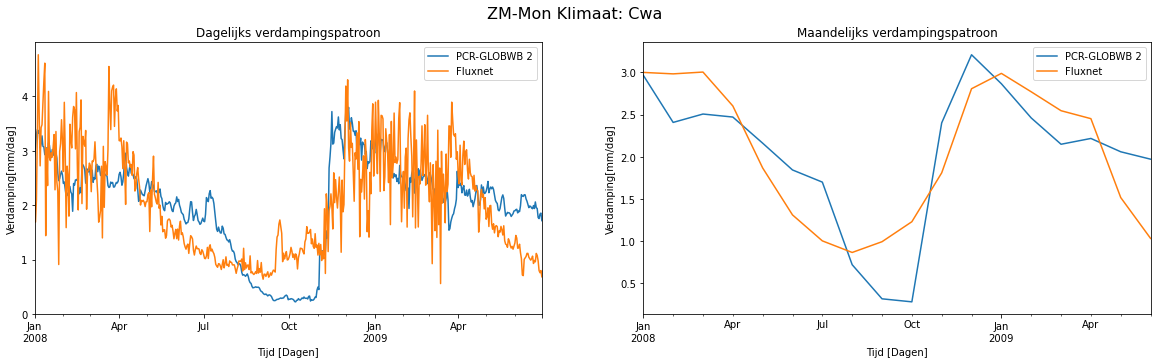

In [18]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/zm-mon_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-34.00210, longitude=140.58910, method='nearest')*1000
ts = data.to_dataframe()
ts = ts["2008-01-01": '2009-06-30']

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_ZM-Mon.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2009-06-30']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'ZM-Mon Klimaat: Cwa',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/zm-mon.jpg')
df.at['ZM-Mon','MEdag']= ME1(ts)[0]
df.at['ZM-Mon','RMSEdag'] = ME1(ts)[1]
df.at['ZM-Mon','MEmaand'] = ME1(tsmaand)[0]
df.at['ZM-Mon','RMSEmaand'] = ME1(tsmaand)[1]


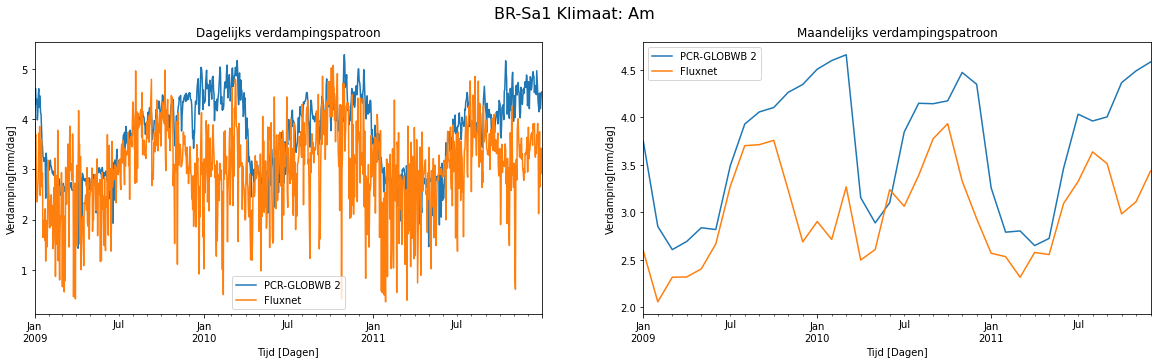

In [19]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/br-sa1b_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=-2.85667, longitude=-54.95889, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_BR-Sa1.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2009-01-01": '2012-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'BR-Sa1 Klimaat: Am',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/br-sa1.jpg')
df.at['BR-Sa1','MEdag']= ME1(ts)[0]
df.at['BR-Sa1','RMSEdag'] = ME1(ts)[1]
df.at['BR-Sa1','MEmaand'] = ME1(tsmaand)[0]
df.at['BR-Sa1','RMSEmaand'] = ME1(tsmaand)[1]

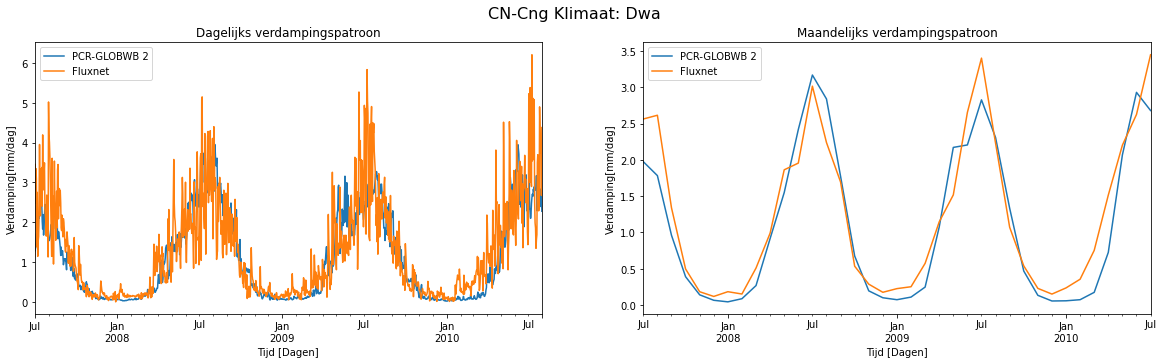

In [20]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/cn-cng_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=44.5934, longitude=123.5092, method='nearest')*1000
ts = data.to_dataframe()
ts = ts["2007-07-01": '2010-07-31']

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_CN-Cng.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2007-07-01": '2010-07-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'CN-Cng Klimaat: Dwa',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/cn-cng.jpg')
df.at['CN-Cng','MEdag']= ME1(ts)[0]
df.at['CN-Cng','RMSEdag'] = ME1(ts)[1]
df.at['CN-Cng','MEmaand'] = ME1(tsmaand)[0]
df.at['CN-Cng','RMSEmaand'] = ME1(tsmaand)[1]

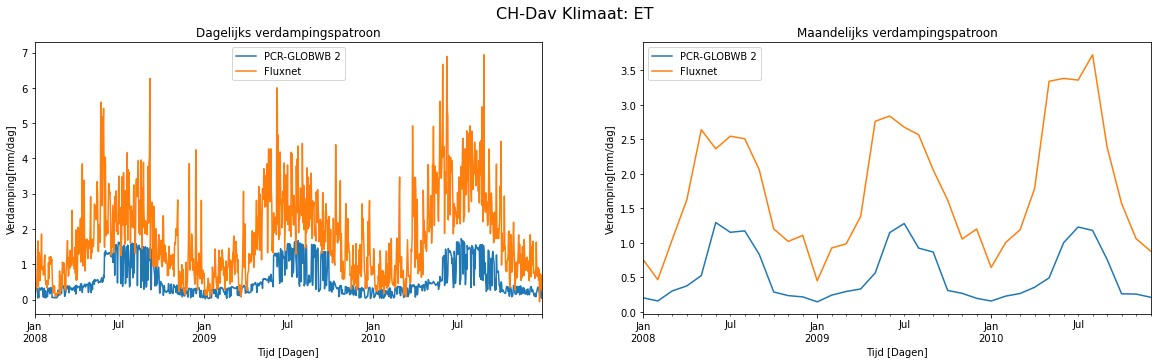

In [37]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/ch-dav_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=46.81533, longitude=9.85591, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_CH-Dav.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2010-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'CH-Dav Klimaat: ET',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/ch-dav.jpg')
df.at['CH-Dav','MEdag']= ME1(ts)[0]
df.at['CH-Dav','RMSEdag'] = ME1(ts)[1]
df.at['CH-Dav','MEmaand'] = ME1(tsmaand)[0]
df.at['CH-Dav','RMSEmaand'] = ME1(tsmaand)[1]

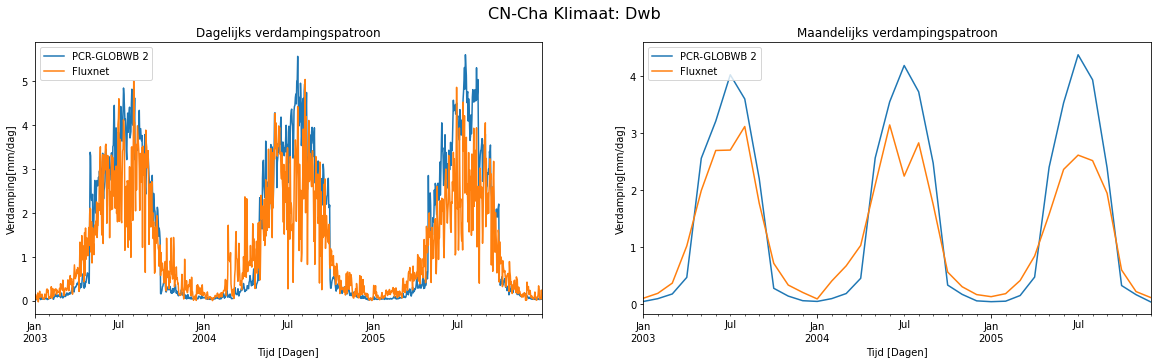

In [38]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/cn-cha_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=46.81533, longitude=9.85591, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_CN-Cha.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2003-01-01": '2005-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'CN-Cha Klimaat: Dwb',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/cn-cha.jpg')
df.at['CN-Cha','MEdag']= ME1(ts)[0]
df.at['CN-Cha','RMSEdag'] = ME1(ts)[1]
df.at['CN-Cha','MEmaand'] = ME1(tsmaand)[0]
df.at['CN-Cha','RMSEmaand'] = ME1(tsmaand)[1]

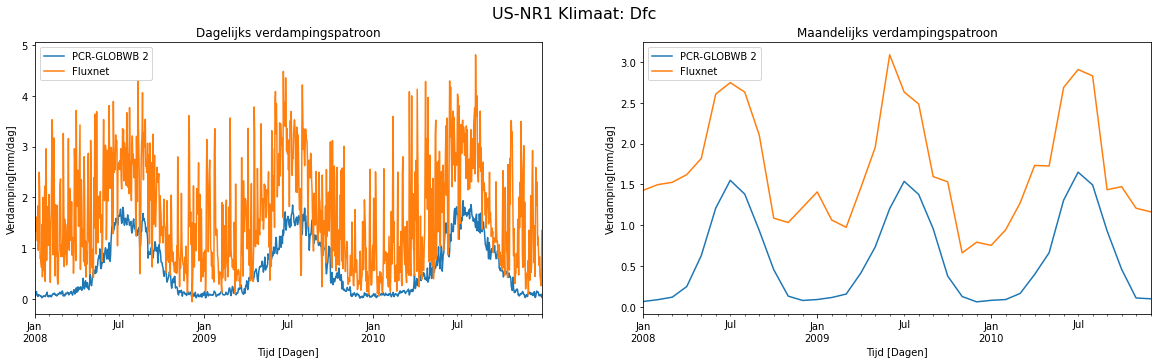

In [23]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/us-nr1_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=46.81533, longitude=9.85591, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_US-NR1.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2010-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'US-NR1 Klimaat: Dfc',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/us-nr1.jpg')
df.at['US-NR1','MEdag']= ME1(ts)[0]
df.at['US-NR1','RMSEdag'] = ME1(ts)[1]
df.at['US-NR1','MEmaand'] = ME1(tsmaand)[0]
df.at['US-NR1','RMSEmaand'] = ME1(tsmaand)[1]

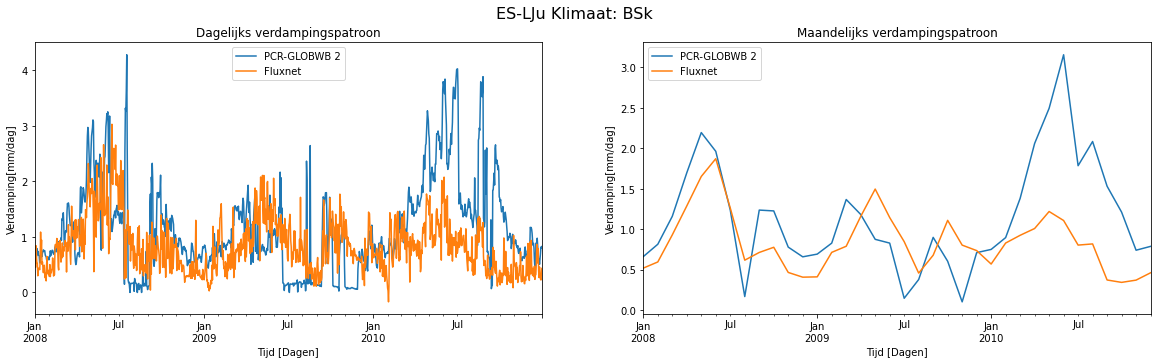

In [24]:
fp='/mnt/home/user43/Sophie_Bep/Resultaten/PCR-GLOBWB/es-lju_output_total_evaporation.nc'
ds = xr.open_dataset(fp)
data = ds.sel(latitude=46.81533, longitude=9.85591, method='nearest')*1000
ts = data.to_dataframe()

Flux = pd.read_csv("/mnt/home/user43/Sophie_Bep/Resultaten/Fluxnet/FLX_ES-LJu.csv", skipinitialspace=True, parse_dates=[0],index_col=0)
Flux = Flux[["LE_F_MDS"]] / (lamda * rho) * 86400000
Flux_ts = Flux["2008-01-01": '2010-12-31']["LE_F_MDS"]
ts = ts.join(Flux_ts)
tsmaand = ts.resample('M', kind='period').mean()

plt.figure(figsize = (20,5))
plt.suptitle(f'ES-LJu Klimaat: BSk',fontsize=16)
plt.subplot(1, 2, 1)
ts['total_evaporation'].plot(label='PCR-GLOBWB 2')
ts['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Dagelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.subplot(1, 2, 2)
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Maandelijks verdampingspatroon')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()

plt.savefig('/mnt/home/user43/Sophie_Bep/Resultaten/Afbeeldingen/es-lju.jpg')
df.at['ES-LJu','MEdag']= ME1(ts)[0]
df.at['ES-LJu','RMSEdag'] = ME1(ts)[1]
df.at['ES-LJu','MEmaand'] = ME1(tsmaand)[0]
df.at['ES-LJu','RMSEmaand'] = ME1(tsmaand)[1]

In [25]:
df

,LOCATION_LAT,LOCATION_LONG,LOCATION_ELEV,Aantal jaar,Klimaat,Vanaf,Tot,totaal,MEdag,RMSEdag,MEmaand,RMSEmaand
SITE_ID,,,,,,,,,,,,
MY-PSO,2.97300,102.30620,NaN,7,Af,2007-01,2009-12,3 jaar,-0.678565,1.118599,-0.678201,0.860786
BR-Sa1,-2.85667,-54.95889,88.0,10,Am,2003-01,2005-12,3 jaar,0.690693,1.089878,0.691183,0.861656
BR-Npw,-16.49800,-56.41200,120.0,4,Aw,2015-07,2017-12,"1,5 jaar",-0.808510,1.483512,-0.808377,1.023944
ZA-Kru,-25.01970,31.49690,359.0,14,BSh,2008-01,2010-12,3 jaar,-0.429059,1.135506,-0.429411,0.953169
ES-LJu,36.92659,-2.75212,1600.0,10,BSk,2008-01,2010-12,3 jaar,0.305754,0.860430,0.305804,0.660281
SD-Dem,13.28290,30.47830,500.0,5,BWh,2008-01,2009-12,2 jaar,-0.810520,1.235033,-0.806719,1.134616
AU-Cpr,-34.00210,140.58910,NaN,5,BWk,2011-01,2013-12,3 jaar,-0.193923,0.527334,-0.197063,0.397295
US-ARM,36.60580,-97.48880,314.0,10,Cfa,2008-01,2010-12,3 jaar,-0.377996,0.927136,-0.379616,0.668155
NL-Loo,52.16658,5.74356,25.0,19,Cfb,2008-01,2010-12,3 jaar,-0.583266,0.821206,-0.582037,0.637317


In [26]:
df.to_csv(r'/mnt/home/user43/Sophie_Bep/Resultaten/Error.csv')